# Credit Card Score
In this notebook, we will go through the implementation of the steps in the Machine Learning Pipeline for research stage. The aim of the project is to build a machine learning model to predict credit card score.

The ML pipeline are as follows:

1. Splitting the preprocessed dataset
2. Training models
3. Imbalanced class with SMOTE
4. Feature importance analysis

## 1. Splitting dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("../data/train_preprocessed.csv")

In [3]:
df.head().T

,0,1,2,3,4
Age,23.000000,23.000000,23.000000,28.000000,28.000000
Occupation,13.000000,13.000000,13.000000,12.000000,14.000000
Annual_Income,19114.000000,19114.000000,19114.000000,34847.000000,34847.000000
Num_Bank_Accounts,3.000000,3.000000,3.000000,2.000000,2.000000
Num_Credit_Card,4.000000,4.000000,4.000000,4.000000,4.000000
Interest_Rate,3.000000,3.000000,3.000000,6.000000,6.000000
Num_of_Loan,4.000000,4.000000,4.000000,1.000000,1.000000
Delay_from_due_date,3.000000,3.000000,3.000000,3.000000,7.000000
Num_of_Delayed_Payment,7.000000,8.000000,6.000000,4.000000,1.000000
Changed_Credit_Limit,11.000000,11.000000,11.000000,5.000000,7.000000


In [4]:
# Split dataset into train and test set
X = df.drop(columns=["Credit_Score"])
y = df["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((31290, 19), (7823, 19))

## 2. Training baseline models

In [5]:
# Make function to evaluate model
def show_score(model, X_train, X_test, y_train, y_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Train Accuracy": accuracy_score(y_train, train_preds),
              "Test Accuracy": accuracy_score(y_test, test_preds)}
    print("Train Accuracy: ", scores["Train Accuracy"])
    print("Test Accuracy: ", scores["Test Accuracy"])

    matrix = confusion_matrix(y_test, test_preds)
    plt.figure(figsize=(5, 3))
    sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
    return scores

RandomForest
Train Accuracy:  1.0
Test Accuracy:  0.7996932123226383


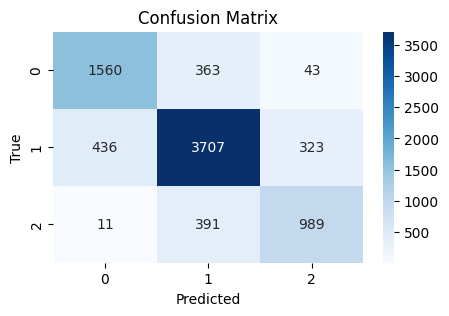


GradientBoosting
Train Accuracy:  0.7423138382869926
Test Accuracy:  0.7408922408283267


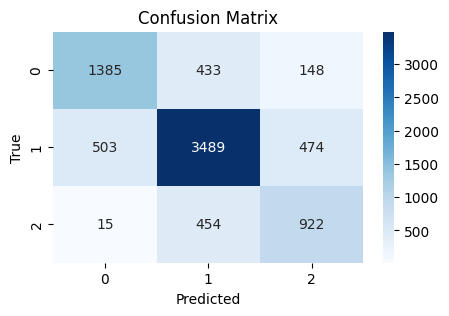


XGBoost
Train Accuracy:  0.8821987855544903
Test Accuracy:  0.780391154288636


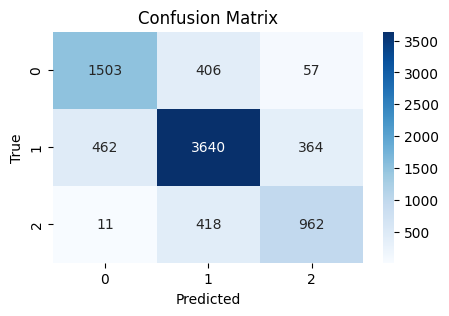


GaussianNB
Train Accuracy:  0.664333652924257
Test Accuracy:  0.6670075418637351


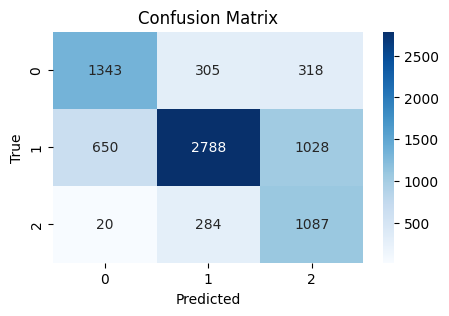


DecisionTree
Train Accuracy:  1.0
Test Accuracy:  0.696791512207593


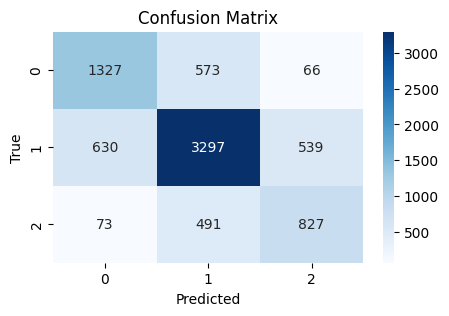

In [6]:
# Start training baseline models
seed = 42

accuracy = {}

models = {
    "RandomForest": RandomForestClassifier(random_state=seed, n_jobs=-1),
    "GradientBoosting": GradientBoostingClassifier(random_state=seed),
    "XGBoost": XGBClassifier(random_state=seed, n_jobs=-1),
    "GaussianNB": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=seed)
}

for name, model in models.items():
    print(name)
    model.fit(X_train, y_train)
    scores = show_score(model, X_train, X_test, y_train, y_test)
    accuracy[name] = scores["Test Accuracy"]
    print("============================================================\n")

In [7]:
# Evaluate baseline models
accuracy_df = pd.DataFrame(list(accuracy.items()), columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
accuracy_df

,Model,Accuracy
0,RandomForest,0.799693
2,XGBoost,0.780391
1,GradientBoosting,0.740892
4,DecisionTree,0.696792
3,GaussianNB,0.667008


In [8]:
# Evaluation on RandomForest model
rf_model = RandomForestClassifier(random_state=seed, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_preds = rf_model.predict(X_test)
rf_report = classification_report(y_test, y_preds)
print(rf_report)

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1966
           1       0.83      0.83      0.83      4466
           2       0.73      0.71      0.72      1391

    accuracy                           0.80      7823
   macro avg       0.78      0.78      0.78      7823
weighted avg       0.80      0.80      0.80      7823



## 3. Imbalance class using SMOTE

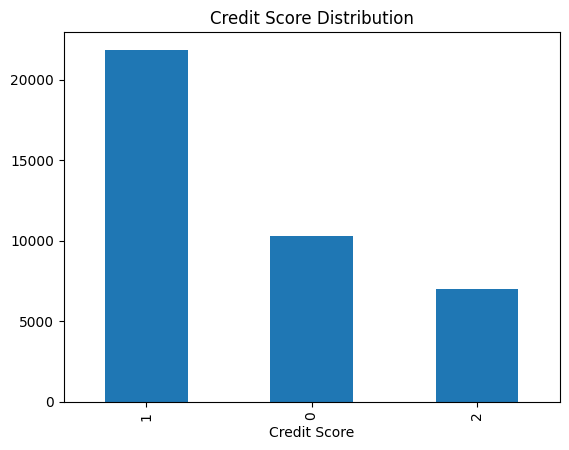

In [9]:
df["Credit_Score"].value_counts().plot(kind="bar")
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.show()

In [10]:
# As we can see from the target distribution, the dataset is imbalanced. We will use SMOTE to balance the dataset
smote_params = {
    "sampling_strategy": "auto",
    "random_state": 42,
    "k_neighbors": 5,
    "n_jobs": -1
}

smote = SMOTE(**smote_params)

X = df.drop(columns=["Credit_Score"])
y = df["Credit_Score"]

X_smote, y_smote = smote.fit_resample(X, y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

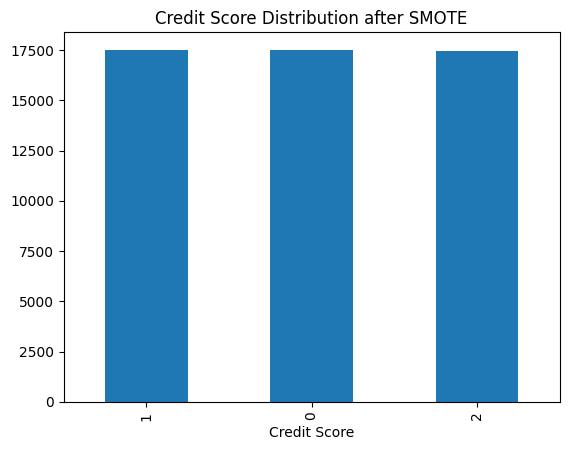

In [11]:
# See the distribution of our target after SMOTE
y_train_smote.value_counts().plot(kind="bar")
plt.title("Credit Score Distribution after SMOTE")
plt.xlabel("Credit Score")
plt.show()

RandomForest
Train Accuracy:  0.9999618502622795
Test Accuracy:  0.8661783779659724


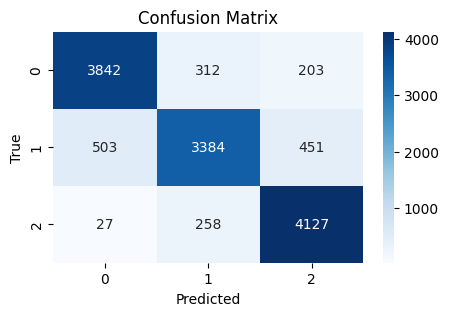


GradientBoosting
Train Accuracy:  0.7743061516452074
Test Accuracy:  0.7798886091401541


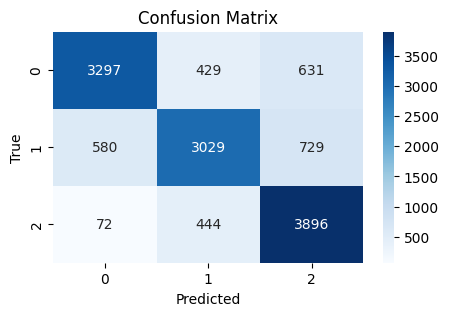


XGBoost
Train Accuracy:  0.8980066762041011
Test Accuracy:  0.8499275196459907


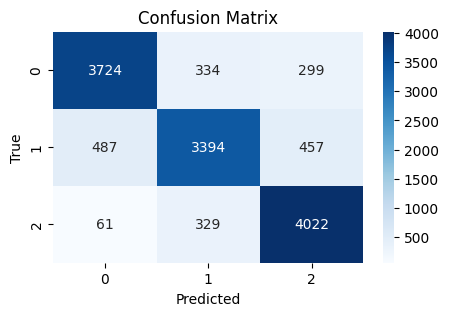


GaussianNB
Train Accuracy:  0.6969384835479256
Test Accuracy:  0.7066453040360113


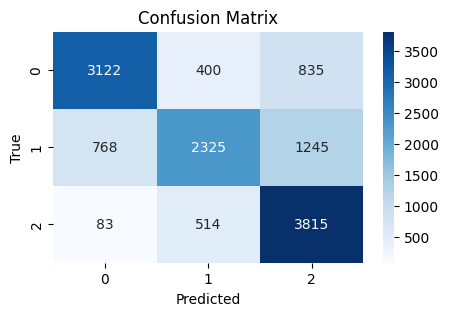


DecisionTree
Train Accuracy:  1.0
Test Accuracy:  0.7838559548332952


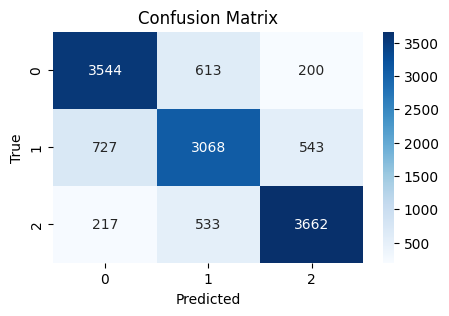

In [12]:
# Start training baseline models
seed = 42

accuracy_smote = {}

models_v2 = {
    "RandomForest": RandomForestClassifier(random_state=seed, n_jobs=-1),
    "GradientBoosting": GradientBoostingClassifier(random_state=seed),
    "XGBoost": XGBClassifier(random_state=seed, n_jobs=-1),
    "GaussianNB": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=seed)
}

for name, model in models.items():
    print(name)
    model.fit(X_train_smote, y_train_smote)
    scores = show_score(model, X_train_smote, X_test_smote, y_train_smote, y_test_smote)
    accuracy_smote[name] = scores["Test Accuracy"]
    print("============================================================\n")

In [13]:
# Evaluate smote models
accuracy_df_smote = pd.DataFrame(list(accuracy_smote.items()), columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
accuracy_df_smote

,Model,Accuracy
0,RandomForest,0.866178
2,XGBoost,0.849928
4,DecisionTree,0.783856
1,GradientBoosting,0.779889
3,GaussianNB,0.706645


In [20]:
# Evaluation on RandomForest SMOTE model
rf_model_v2 = RandomForestClassifier(random_state=seed, n_jobs=-1)
rf_model_v2.fit(X_train_smote, y_train_smote)

y_preds_v2 = rf_model_v2.predict(X_test_smote)
rf_report_v2 = classification_report(y_test_smote, y_preds_v2)
print(rf_report_v2)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4357
           1       0.86      0.78      0.82      4338
           2       0.86      0.94      0.90      4412

    accuracy                           0.87     13107
   macro avg       0.87      0.87      0.86     13107
weighted avg       0.87      0.87      0.86     13107



## 4. Feature importance

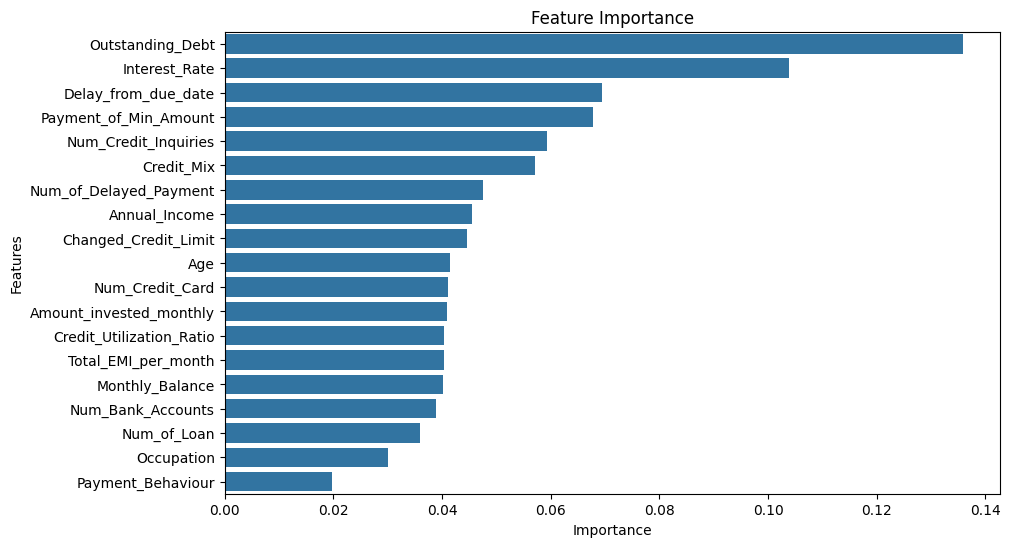

In [21]:
# Make feature importance
feature_importance = (pd.DataFrame({"features": X_train_smote.columns, 
                                    "importance": rf_model_v2.feature_importances_})
                        .sort_values(by="importance", ascending=False)
                        .reset_index(drop=True))

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x="importance", y="features")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

**Conclusions:**
1. Random forest yield the best accuracy on validation set with 80% accuracy.
2. After using SMOTE technique, the accuracy of all the models increased, with RF with accuracy of 87%.
3. Importance score shows that outstanding debt is the highest feature that affect the overall credit score.